# 7. Hafta Lab-1: Yapay Sinir Ağları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Image

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

# Egitim ve test veri kumeleri olustur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Yapay sinir ağı modeli oluştur

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
X_train.shape[1]

34

### Modeli compile edelim

In [7]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Modeli inceleyelim.

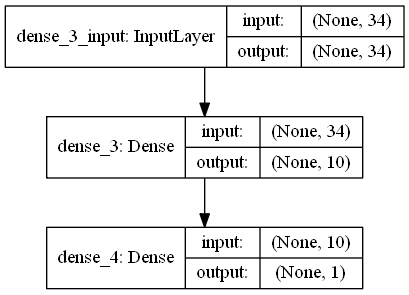

In [8]:
plot_model(model, show_shapes=True,to_file="binary.png")
Image("binary.png")

### Modeli eğitelim

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1024, verbose=1, validation_split=0.33)

Train on 221765 samples, validate on 109228 samples
Epoch 1/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0296 - acc: 0.9933 - val_loss: 0.0288 - val_acc: 0.9932
Epoch 2/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0297 - acc: 0.9932 - val_loss: 0.0284 - val_acc: 0.9938
Epoch 3/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0299 - acc: 0.9932 - val_loss: 0.0296 - val_acc: 0.9928
Epoch 4/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0302 - acc: 0.9932 - val_loss: 0.0301 - val_acc: 0.9909
Epoch 5/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0305 - acc: 0.9929 - val_loss: 0.0297 - val_acc: 0.9936
Epoch 6/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0299 - acc: 0.9934 - val_loss: 0.0281 - val_acc: 0.9938
Epoch 7/50
221765/221765 [==============================] - 1s 6us/step - loss: 0.0293 - acc: 0.9935 - val_loss: 0.0279 

### Sınıflandırma modelinin performansına bakalım.

In [13]:
y_pred = model.predict_classes(X_test)

In [14]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.97      1.00      0.98     32123\n          1       1.00      0.99      1.00    130904\n\navg / total       0.99      0.99      0.99    163027\n'

In [15]:
accuracy_score(y_test, y_pred)

0.9936758941770382

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 32080,     43],
       [   988, 129916]], dtype=int64)

### Eğitim tarihçesini inceliyelim.

In [17]:
y_hat = model.predict(X_test)

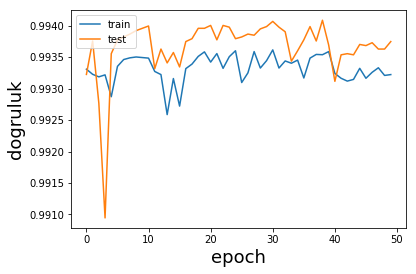

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

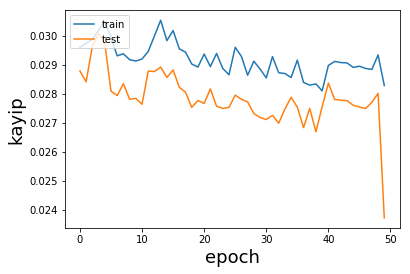

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Model karmaşıklığını neuron ekleyerek artıralım

In [21]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=1024, verbose=1, validation_split=0.33)

Train on 221765 samples, validate on 109228 samples
Epoch 1/25
221765/221765 [==============================] - 2s 10us/step - loss: 0.1452 - acc: 0.9650 - val_loss: 0.0446 - val_acc: 0.9882
Epoch 2/25
221765/221765 [==============================] - 2s 7us/step - loss: 0.0358 - acc: 0.9888 - val_loss: 0.0292 - val_acc: 0.9900
Epoch 3/25
221765/221765 [==============================] - 2s 7us/step - loss: 0.0272 - acc: 0.9910 - val_loss: 0.0246 - val_acc: 0.9916
Epoch 4/25
221765/221765 [==============================] - 2s 7us/step - loss: 0.0233 - acc: 0.9921 - val_loss: 0.0215 - val_acc: 0.9928
Epoch 5/25
221765/221765 [==============================] - 2s 7us/step - loss: 0.0212 - acc: 0.9925 - val_loss: 0.0199 - val_acc: 0.9929
Epoch 6/25
221765/221765 [==============================] - 2s 8us/step - loss: 0.0196 - acc: 0.9926 - val_loss: 0.0182 - val_acc: 0.9931
Epoch 7/25
221765/221765 [==============================] - 2s 7us/step - loss: 0.0190 - acc: 0.9927 - val_loss: 0.0179

### Sınıflandırma performansı

In [22]:
y_hat = model.predict(X_test)
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.97      1.00      0.98     32123\n          1       1.00      0.99      1.00    130904\n\navg / total       0.99      0.99      0.99    163027\n'

In [23]:
accuracy_score(y_test, y_pred)

0.9936758941770382

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 32080,     43],
       [   988, 129916]], dtype=int64)

### Eğitim tarihçesi

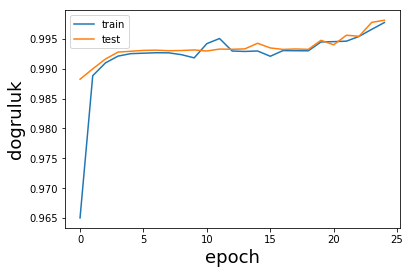

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyon değişimi

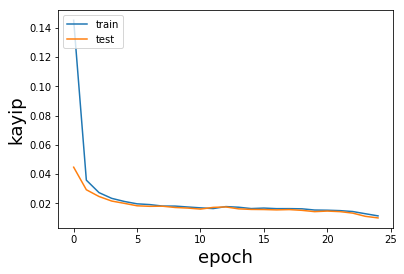

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()